### Arahan Assignment
0. Gunakan dataset student score
1. Lakukan proses Exploratory data analysis
2. Lakukan feature engineering :
- Check Duplicated Data
- Check Missing Value Handling
- Outlier Analysis
3. Lakukan modelling machine learning regression : gunakan minimal 2 model (linear regression, decision tree regressor, atau random forest regressor)
4. Lakukan evaluasi model
5. Berikan kesimpulan model mana yang terbaik performanya

In [ ]:
# Import libraries and resources
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read the dataset using pandas
data = pd.read_excel('student_scores.xlsx', engine='openpyxl') # Use pd.read_excel with the 'openpyxl' engine

In [ ]:
# This display the top 7 rows of the data
data.head(7)

,Hours (x),Scores (y)
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88


In [ ]:
# Provides some informaion regarding the columns in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Hours (x)   25 non-null     float64
 1   Scores (y)  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
# this describe the basic stat behind the dataset used
data.describe()

,Hours (x),Scores (y)
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Exploratory Data Analysis

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x600 with 0 Axes>

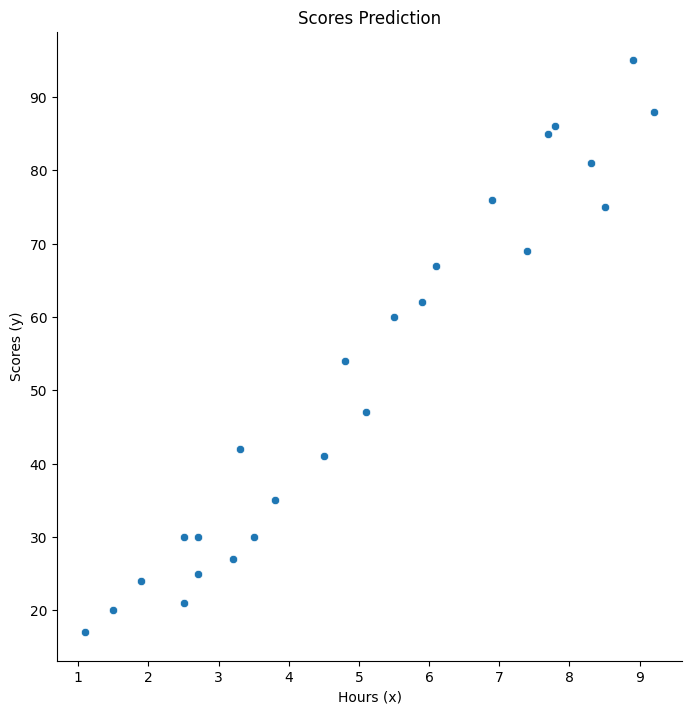

In [ ]:
# These Plots help explain the values and how they are scattered

plt.figure(figsize=(12,6))
sns.pairplot(data,x_vars=['Hours (x)'],y_vars=['Scores (y)'],size=7,kind='scatter')
plt.xlabel('Hours (x)')
plt.ylabel('Scores (y)')
plt.title('Scores Prediction')
plt.show()

Feature Engineering
  1.Check Duplicated Data
  2.Check Missing Value Handing
  3.Outlier Analysis
  4.Encoding categorical

  Investigasi of Feature Engineering



In [ ]:
df = data.copy()

In [ ]:
#Check Duplicated Data
print("DataSebelum Pemeriksaan Duplikat:")
print(df.shape)

DataSebelum Pemeriksaan Duplikat:
(25, 2)


In [ ]:
duplicate_rows_before = df[df.duplicated()]
duplicate_rows_before

,Hours (x),Scores (y)


In [ ]:
df = df.drop_duplicates()

In [ ]:
print("\nData Setelah Pemeriksaan Duplikat;")
print(df.shape)


Data Setelah Pemeriksaan Duplikat;
(25, 2)


In [ ]:
#Check missing value
df.isna().sum()

,0
Hours (x),0
Scores (y),0


There is no missing value

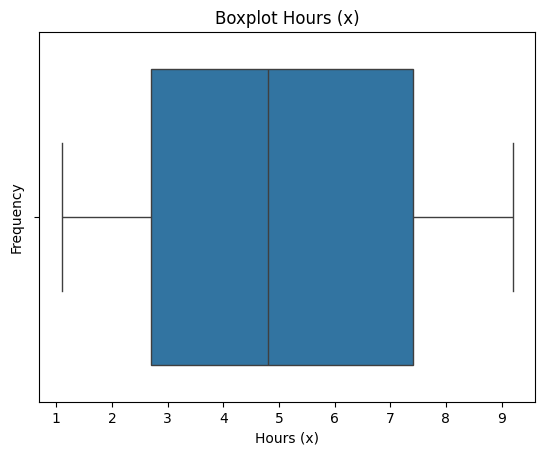

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Outlier Analysis
sns.boxplot(x="Hours (x)", data=df)

# Menambahkan label sumbu dan judul
plt.xlabel("Hours (x)")
plt.ylabel("Frequency") # Anda bisa mengunakan "Hours (x)" atau "Jam"
plt.title("Boxplot Hours (x)")

# Menampilkan plot
plt.show()

There's bo outlier value

There are no problem in invetigates Feature Enghineering. next we are doing machine learning modelling and Splitting data into x_train, x_test-> Predictor, y_train, y_test-> target variabels. if there are problems in investigate Feature engineering then doing splitting data and process feature engineering handing

Splitiing the data

In [ ]:
# (x) Hours data
x = data['Hours (x)']
x.head()

,Hours (x)
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [ ]:
# Scores (y) data
y = data['Scores (y)']
y.head()

,Scores (y)
0,21
1,47
2,27
3,75
4,30


In [ ]:
# Import machine learning data from scikit learn
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data for train and test
# train : test = 75 ; 25 atau 80 : 20 atau 70:30 atau 85:15
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75, random_state=42)

In [ ]:
x_train

,Hours (x)
1,5.1
22,3.8
5,1.5
2,3.2
12,4.5
15,8.9
3,8.5
4,3.5
20,2.7
17,1.9


In [ ]:
x_test

,Hours (x)
8,8.3
16,2.5
0,2.5
23,6.9
11,5.9
9,2.7
13,3.3


Linear Regression

In [ ]:
# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression

In [ ]:
# Create new axis for X column in array
import numpy as np
# Convert x_train and x_test to NumPy arrays
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

# Add new axis to the and
x_train = x_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]

In [ ]:
#array
x_train

array([[5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [ ]:
#array
x_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

In [ ]:
y_train

,Scores (y)
1,47
22,35
5,20
2,27
12,41
15,95
3,75
4,30
20,30
17,24


In [ ]:
# Fitting teh model using linear Regression
lr_model = LinearRegression() # Mahasiswa A
lr_model.fit(x_train,y_train) # Belajar

LinearRegression()

In [ ]:
y_pred_train = lr_model.predict(x_train)
y_pred_train

array([52.02223727, 39.39391742, 17.05150538, 33.56546211, 46.19378196,
       88.93578761, 85.05015073, 36.47968977, 28.70841601, 20.93714226,
       49.10800962, 61.73632947, 78.25028619, 55.90787415, 77.27887697,
       13.1658685 , 74.36464932, 91.85001526])

In [ ]:
y_train

,Scores (y)
1,47
22,35
5,20
2,27
12,41
15,95
3,75
4,30
20,30
17,24


In [ ]:
# Predicting the Scores (x) For the test values
y_pred = lr_model.predict(x_test) # UTS atapun UAS

In [ ]:
x_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

In [ ]:
y_pred

array([83.10733229, 26.76559757, 26.76559757, 69.50760322, 59.79351103,
       28.70841601, 34.53687133])

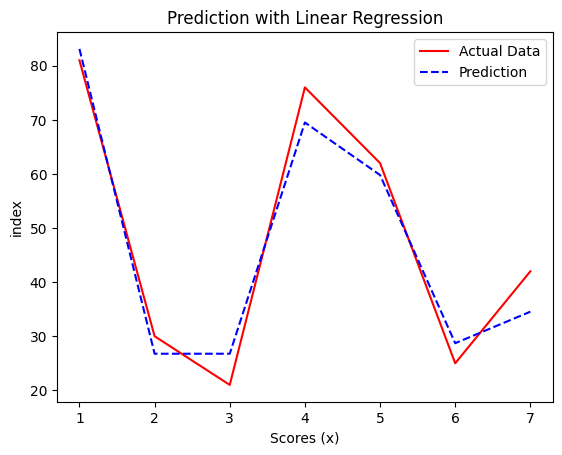

In [ ]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Scores (x)')
plt.ylabel('index')
plt.title('Prediction with Linear Regression')
plt.legend()
plt.show()

In [ ]:
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
# Caculate R square vale
rsq = r2_score(y_test,y_pred)

In [ ]:
print('r square Linear Regression:' ,rsq)

r square Linear Regression: 0.9553509219739938


In [ ]:
# Intecept and coeff the line
print('Intercept of the Linear Regression model:',lr_model.intercept_)
print('coefficient of the line Linear Regression:', lr_model.coef_)

Intercept of the Linear Regression model: 2.4803670915057623
coefficient of the line Linear Regression: [9.71409219]


Then is said to from a line with result in Linear Regression

### y = 2.4803 + 9.7140 x

with x is value of Hours x work

Decision Tree Regressor Using another Machine Learning M

1.   Decision Tree
2.   Random Forest




In [ ]:
from sklearn.tree import DecisionTreeRegressor # mahasiswa

In [ ]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Predicting the Scores (y) for the Test values
y_pred_dt = dt_model.predict(x_test) # soal uts maupun uas

In [ ]:
y_pred_dt

array([75., 30., 30., 69., 67., 30., 27.])

In [ ]:
y_test

,Scores (y)
8,81
16,30
0,21
23,76
11,62
9,25
13,42


In [ ]:
x_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

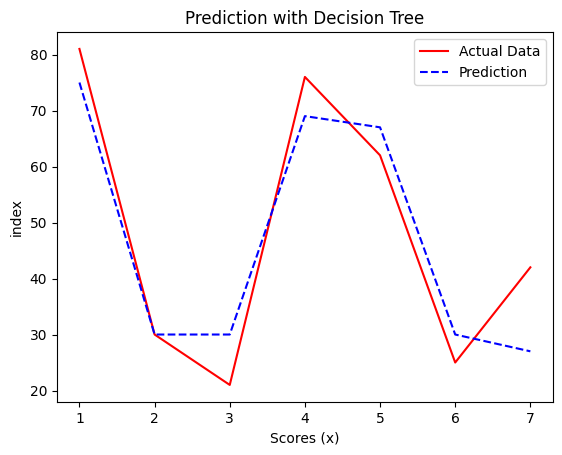

In [ ]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_dt,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Scores (x)')
plt.ylabel('index')
plt.title('Prediction with Decision Tree')
plt.legend()
plt.show()

In [ ]:
# Caculate R saquare vale
rsq_dt = r2_score(y_test,y_pred_dt)

In [ ]:
print('r square Descision Tree Result:',rsq_dt)

r square Descision Tree Result: 0.8803859268443893


# Using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()

you can doing using RandomForest Regressor with the same flow like Decision Tree or LinearRegression above:)